In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

#nltk.download('punkt')
#nltk.download('stopwords')

In [2]:
# Load the Amazon product review dataset
#data = pd.read_csv('Amazon_dataset.csv')
data = pd.read_excel('Amazon.xlsx')
data.dropna(inplace = True)
data['review_body'] = data['review_body'].apply(lambda x: str(x))

C:\Users\hp\AppData\Local\Temp\ipykernel_8100\3034391128.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data = pd.read_excel('Amazon.xlsx')


In [3]:
#Exploratory Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 30013
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marketplace        30000 non-null  object        
 1   customer_id        30000 non-null  float64       
 2   review_id          30000 non-null  object        
 3   product_id         30000 non-null  object        
 4   product_parent     30000 non-null  float64       
 5   product_title      30000 non-null  object        
 6   product_category   30000 non-null  object        
 7   star_rating        30000 non-null  float64       
 8   helpful_votes      30000 non-null  float64       
 9   total_votes        30000 non-null  float64       
 10  vine               30000 non-null  object        
 11  verified_purchase  30000 non-null  object        
 12  review_headline    30000 non-null  object        
 13  review_body        30000 non-null  object        
 14  review

In [4]:
data['product_category'].value_counts()

Beauty                    5000
Major Appliances          5000
Mobile_Electronics        5000
Health & Personal Care    5000
Sports                    5000
Pet Products              5000
Name: product_category, dtype: int64

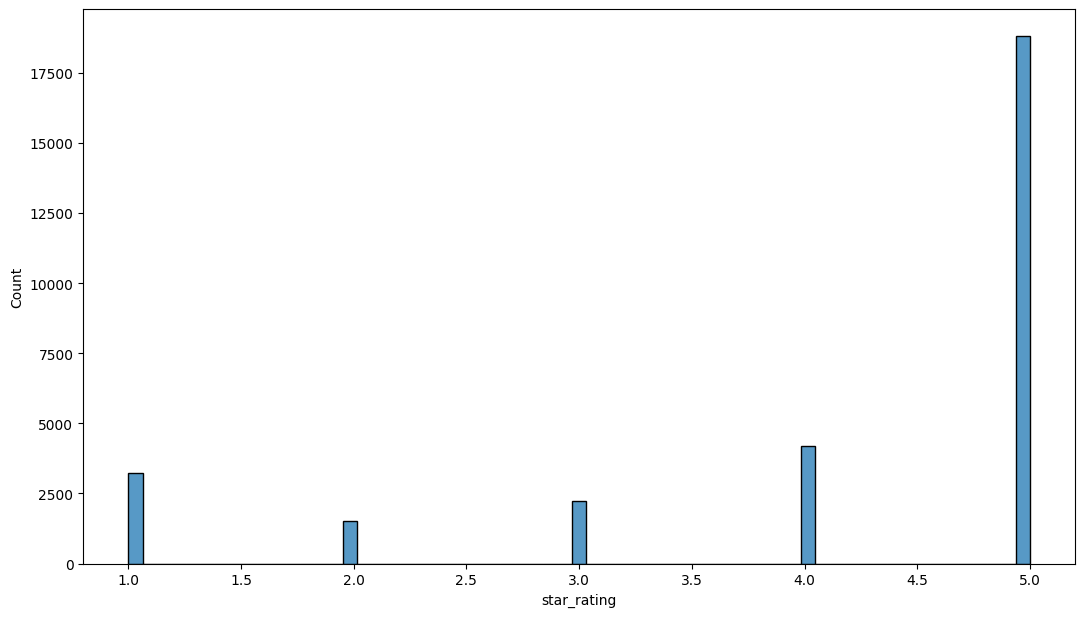

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12.8,7.2))

sns.histplot(data['star_rating'])
plt.show()

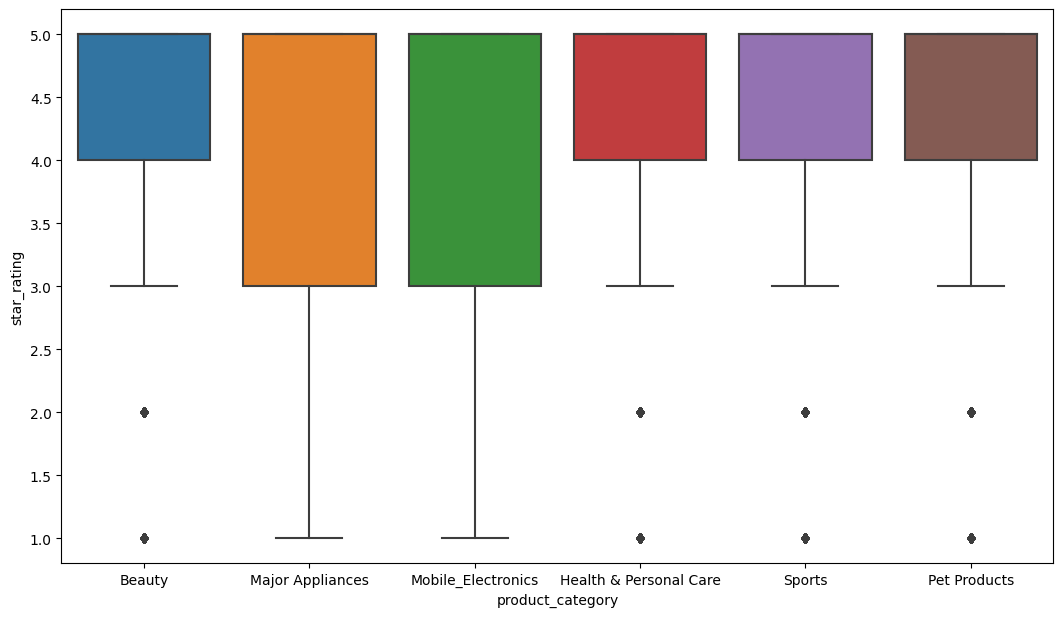

In [6]:
plt.figure(figsize= (12.8,7.2))
sns.boxplot(x='product_category', y='star_rating', data=data)
plt.show()

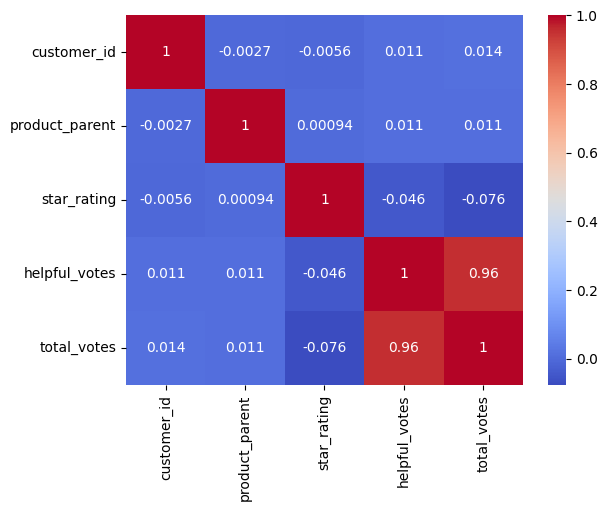

In [7]:
sns.heatmap(data.corr(),annot = True, cmap='coolwarm')
plt.show()

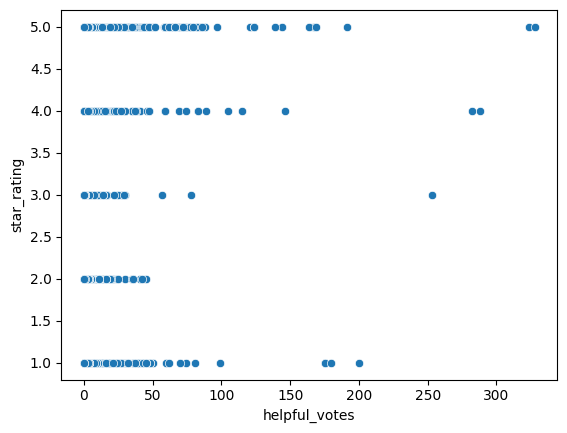

In [8]:
sns.scatterplot(x="helpful_votes",y = 'star_rating',data=data)
plt.show()

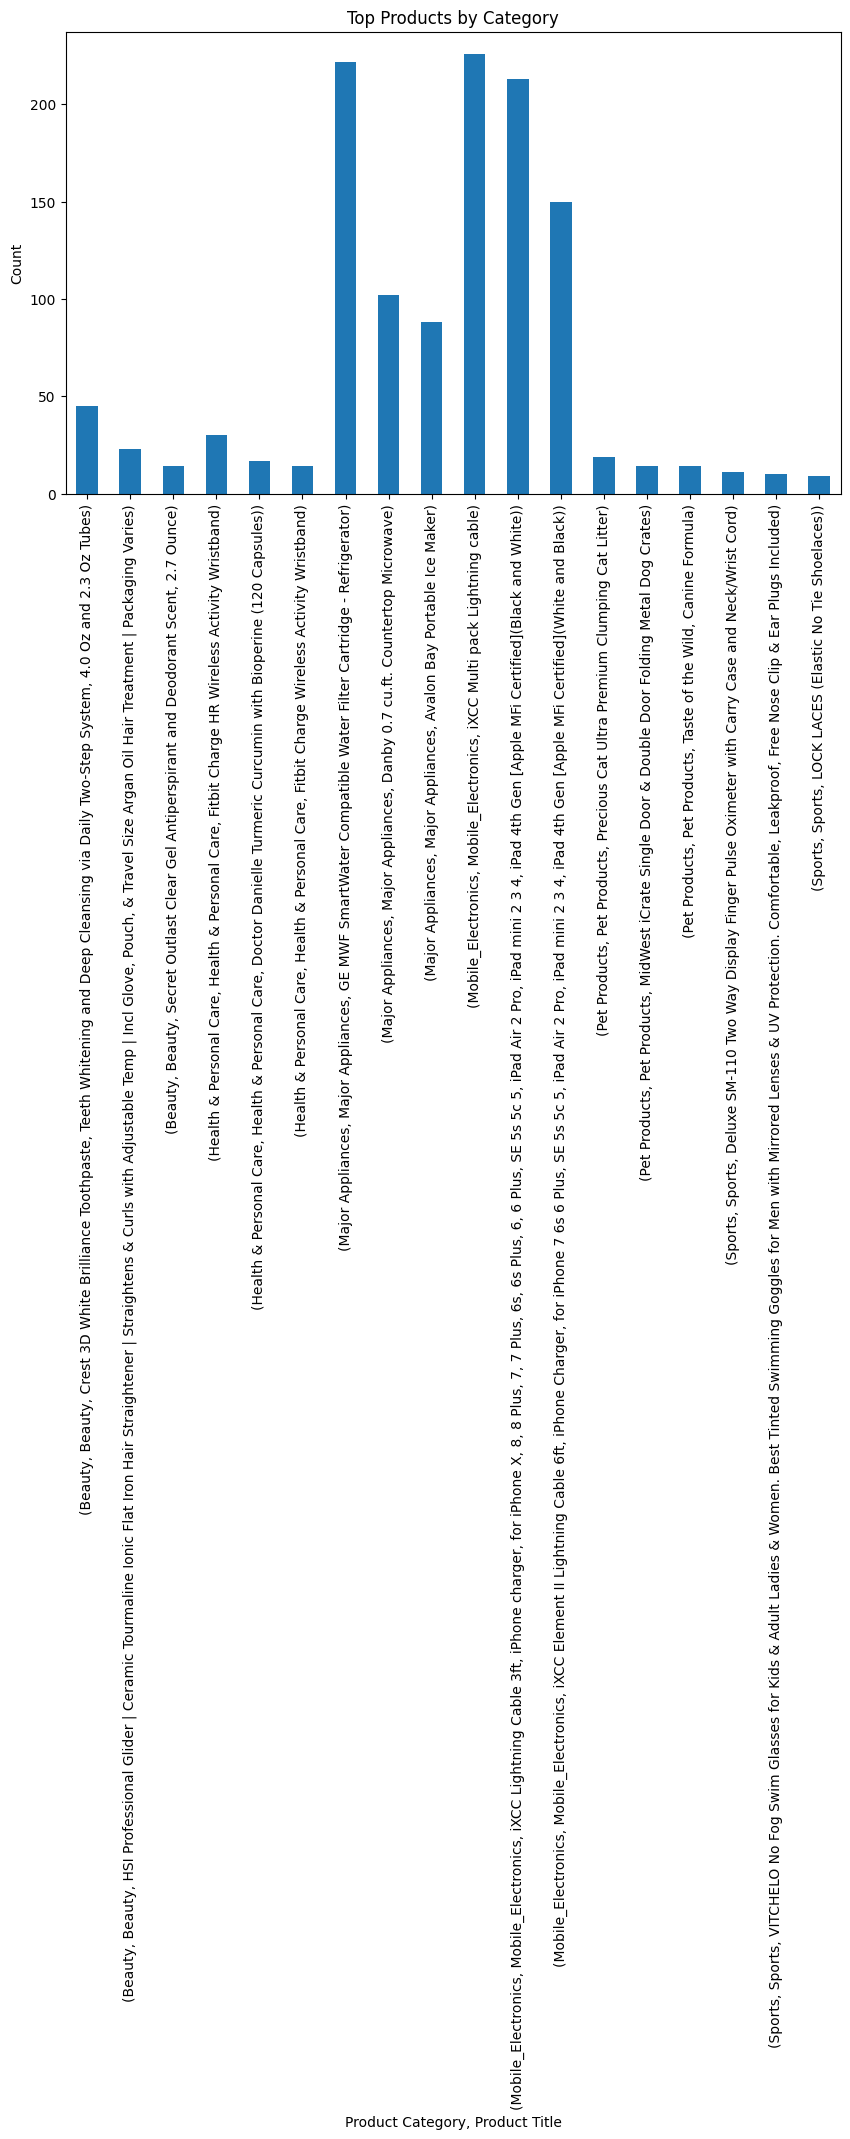

In [9]:
top_products_by_category = data.groupby('product_category')['product_title'].value_counts().groupby(level=0).nlargest(3)
fig, ax = plt.subplots(figsize=(10, 6))

top_products_by_category.plot(kind='bar')
ax.set_title('Top Products by Category')
ax.set_xlabel('Product Category, Product Title')
ax.set_ylabel('Count')

plt.show()

In [10]:
top_customers = data['customer_id'].value_counts().nlargest(10)
print(top_customers)

21959897.0    42
23208852.0    29
12612039.0    26
48872127.0    26
11599687.0    20
44877916.0    20
50657459.0    19
25414497.0    17
19397215.0    17
47120494.0    17
Name: customer_id, dtype: int64


In [11]:
avg_ratings = data.groupby('product_title')['star_rating'].mean().sort_values(ascending=False)
print(avg_ratings.head(10))

product_title
✮ LED Pulse Bluetooth 4.0 Full Spectrum Smart Speaker! Tribe Wireless Indoor Outdoor Speaker, Built In Microphone For Answering Calls / Loud & Crystal Clear Full Range HD Sound ✮ With 5x 360 Degree Light Modes Millions Of Light Patterns / AUX, SD, TF Card Support, / 8 Hour Playtime Li-ion Battery / ✮ One Year Warranty!    5.0
Marcy Utility Bench SB-350 – Adjustable 6 Position                                                                                                                                                                                                                                                                                  5.0
MapofBeauty Clip in Oblique Bang Hair Extensions Hair Accessorie                                                                                                                                                                                                                                                                    5.0
Ma

In [12]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = ''.join(word for word in text if not word.isdigit())

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and perform stemming
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]

    # Join the tokens back into a string
    clean_text = ' '.join(tokens)

    return clean_text

data['review_body'] = data['review_body'].apply(clean_text)

In [13]:
data['review_body']

0                                     love excel sun block
1        great thing cream doesnt smell weird like chem...
2                          great product im year old claim
3        use shower cap condit cap like theyr bulk save...
4        goto daili sunblock leav white cast clean plea...
                               ...                        
30009     work greatbr get wet reason tobr gal water proof
30010    old batch gameday color tast differ ive bought...
30011    take vitamin year make differ mental physicall...
30012          good cotton flawlessli sewb togeth good job
30013    kite super cool look easi assembl one cross ba...
Name: review_body, Length: 30000, dtype: object

In [14]:
# Select relevant columns
reviews = data[['review_body', 'star_rating', 'helpful_votes','total_votes']]

# Convert star_rating to binary sentiment labels
reviews['sentiment'] = np.where(reviews['star_rating'] >= 4, 1, 0)

# Apply weights based on helpful_votes
reviews['weight'] = reviews['helpful_votes'] / (reviews['total_votes'] + 1)

# Split the data into training and testing sets
train_data, test_data = train_test_split(reviews, test_size=0.3, random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_8100\2144490277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'] = np.where(reviews['star_rating'] >= 4, 1, 0)
C:\Users\hp\AppData\Local\Temp\ipykernel_8100\2144490277.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['weight'] = reviews['helpful_votes'] / (reviews['total_votes'] + 1)


In [15]:
# Preprocess the text data
max_vocab_size = 10000
max_seq_length = 100
embedding_dim = 300

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(train_data['review_body'])
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_data['review_body'])
train_padded = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_data['review_body'])
test_padded = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post', truncating='post')

In [16]:
# Load the pretrained embedding
embedding_index = {}
with open('glove.6B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((max_vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < max_vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [17]:
# Load the pretrained embedding 2
import gensim.downloader as api
# Load the pre-trained Word2Vec model
wv = api.load('word2vec-google-news-300')
embedding_dim = 300
# Create the embedding matrix
max_vocab_size = min(max_vocab_size, len(word_index)) + 1
embedding_matrix = np.zeros((max_vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < max_vocab_size:
        try:
            embedding_vector = wv.get_vector(word)
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [18]:
#Define the CNN model 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model
model_1.fit(train_padded, train_data['sentiment'], sample_weight=train_data['weight'], validation_data=(test_padded, test_data['sentiment']), epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(test_padded, test_data['sentiment'], verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
y_pred = (model_1.predict(test_padded) > 0.5).astype(int)

# Generate classification report
target_names = ['Negative', 'Positive']
report1 = classification_report(test_data['sentiment'], y_pred, target_names=target_names, output_dict=True)
print(classification_report(test_data['sentiment'], y_pred, target_names=target_names))

Epoch 1/10
329/329 [==============================] - 29s 83ms/step - loss: 0.0758 - accuracy: 0.7848 - val_loss: 0.4070 - val_accuracy: 0.8224
Epoch 2/10
329/329 [==============================] - 31s 93ms/step - loss: 0.0517 - accuracy: 0.8236 - val_loss: 0.3893 - val_accuracy: 0.8192
Epoch 3/10
329/329 [==============================] - 30s 91ms/step - loss: 0.0302 - accuracy: 0.8470 - val_loss: 0.4536 - val_accuracy: 0.7921
Epoch 4/10
329/329 [==============================] - 29s 89ms/step - loss: 0.0138 - accuracy: 0.8621 - val_loss: 0.5491 - val_accuracy: 0.8294
Epoch 5/10
329/329 [==============================] - 27s 82ms/step - loss: 0.0072 - accuracy: 0.8692 - val_loss: 0.6234 - val_accuracy: 0.8263
Epoch 6/10
329/329 [==============================] - 28s 84ms/step - loss: 0.0045 - accuracy: 0.8686 - val_loss: 0.6565 - val_accuracy: 0.8267
Epoch 7/10
329/329 [==============================] - 27s 83ms/step - loss: 0.0045 - accuracy: 0.8630 - val_loss: 0.7297 - val_accuracy:

In [19]:
statements = ["This product is great!", "I don't really like the product","this product is shit","irritated my eyes and didn't work"]

# Convert the input statements to numerical data using the same tokenizer that was used during training
sequences = tokenizer.texts_to_sequences(statements)
X = pad_sequences(sequences, maxlen=100)

# Make predictions using the trained model
predictions = model_1.predict(X)

# Print the predictions
for i, statement in enumerate(statements):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Statement: {statement} | Sentiment: {sentiment} | Sentiment Score: {predictions[i]}")

1/1 [==============================] - 0s 42ms/step
Statement: This product is great! | Sentiment: Positive | Sentiment Score: [0.6369403]
Statement: I don't really like the product | Sentiment: Negative | Sentiment Score: [0.26310903]
Statement: this product is shit | Sentiment: Negative | Sentiment Score: [0.24643418]
Statement: irritated my eyes and didn't work | Sentiment: Negative | Sentiment Score: [0.42629537]


In [20]:
# Define the CNN model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
    tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_2.fit(train_padded, train_data['sentiment'], sample_weight=train_data['weight'], validation_data=(test_padded, test_data['sentiment']), epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = model_2.evaluate(test_padded, test_data['sentiment'], verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
y_pred = (model_2.predict(test_padded) > 0.5).astype(int)

# Generate classification report
target_names = ['Negative', 'Positive']
report2 = classification_report(test_data['sentiment'], y_pred, target_names=target_names, output_dict=True)
print(classification_report(test_data['sentiment'], y_pred, target_names=target_names))

Epoch 1/10
329/329 [==============================] - 32s 94ms/step - loss: 0.0779 - accuracy: 0.7783 - val_loss: 0.4132 - val_accuracy: 0.8078
Epoch 2/10
329/329 [==============================] - 37s 112ms/step - loss: 0.0616 - accuracy: 0.8128 - val_loss: 0.3992 - val_accuracy: 0.8022
Epoch 3/10
329/329 [==============================] - 32s 97ms/step - loss: 0.0506 - accuracy: 0.8215 - val_loss: 0.3937 - val_accuracy: 0.8177
Epoch 4/10
329/329 [==============================] - 32s 99ms/step - loss: 0.0379 - accuracy: 0.8335 - val_loss: 0.4092 - val_accuracy: 0.8103
Epoch 5/10
329/329 [==============================] - 32s 97ms/step - loss: 0.0304 - accuracy: 0.8362 - val_loss: 0.4839 - val_accuracy: 0.8027
Epoch 6/10
329/329 [==============================] - 39s 117ms/step - loss: 0.0216 - accuracy: 0.8488 - val_loss: 0.4932 - val_accuracy: 0.8247
Epoch 7/10
329/329 [==============================] - 38s 116ms/step - loss: 0.0167 - accuracy: 0.8530 - val_loss: 0.5357 - val_accura

In [21]:
statements = ["This product is great!", "I don't really like the product","this product is shit","irritated my eyes and didn't work"]

# Convert the input statements to numerical data using the same tokenizer that was used during training
sequences = tokenizer.texts_to_sequences(statements)
X = pad_sequences(sequences, maxlen=100)

# Make predictions using the trained model
predictions = model_2.predict(X)

# Print the predictions
for i, statement in enumerate(statements):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Statement: {statement} | Sentiment: {sentiment} | Sentiment Score: {predictions[i]}")

1/1 [==============================] - 0s 46ms/step
Statement: This product is great! | Sentiment: Positive | Sentiment Score: [0.6614739]
Statement: I don't really like the product | Sentiment: Positive | Sentiment Score: [0.83026403]
Statement: this product is shit | Sentiment: Positive | Sentiment Score: [0.76829445]
Statement: irritated my eyes and didn't work | Sentiment: Negative | Sentiment Score: [0.34756556]


In [22]:
# Define the CNN model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding='valid', strides=1, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding='valid', strides=1, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_3.fit(train_padded, train_data['sentiment'], sample_weight=train_data['weight'], validation_data=(test_padded, test_data['sentiment']), epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(test_padded, test_data['sentiment'], verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
y_pred = (model_3.predict(test_padded) > 0.5).astype(int)

# Generate classification report
target_names = ['Negative', 'Positive']
report3 = classification_report(test_data['sentiment'], y_pred, target_names=target_names, output_dict=True)
print(classification_report(test_data['sentiment'], y_pred, target_names=target_names))

Epoch 1/10
329/329 [==============================] - 29s 84ms/step - loss: 0.1535 - accuracy: 0.7644 - val_loss: 0.5121 - val_accuracy: 0.7223
Epoch 2/10
329/329 [==============================] - 27s 81ms/step - loss: 0.0837 - accuracy: 0.7862 - val_loss: 0.4548 - val_accuracy: 0.8110
Epoch 3/10
329/329 [==============================] - 27s 81ms/step - loss: 0.0791 - accuracy: 0.8073 - val_loss: 0.4513 - val_accuracy: 0.8044
Epoch 4/10
329/329 [==============================] - 30s 91ms/step - loss: 0.0770 - accuracy: 0.8124 - val_loss: 0.4532 - val_accuracy: 0.8001
Epoch 5/10
329/329 [==============================] - 30s 90ms/step - loss: 0.0742 - accuracy: 0.8167 - val_loss: 0.4169 - val_accuracy: 0.8217
Epoch 6/10
329/329 [==============================] - 35s 106ms/step - loss: 0.0722 - accuracy: 0.8174 - val_loss: 0.4227 - val_accuracy: 0.8204
Epoch 7/10
329/329 [==============================] - 32s 98ms/step - loss: 0.0696 - accuracy: 0.8175 - val_loss: 0.4147 - val_accuracy

In [23]:
statements = ["This product is great!", "I don't really like the product","this product is shit","irritated my eyes and didn't work"]

# Convert the input statements to numerical data using the same tokenizer that was used during training
sequences = tokenizer.texts_to_sequences(statements)
X = pad_sequences(sequences, maxlen=100)

# Make predictions using the trained model
predictions = model_3.predict(X)

# Print the predictions
for i, statement in enumerate(statements):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Statement: {statement} | Sentiment: {sentiment} | Sentiment Score: {predictions[i]}")

1/1 [==============================] - 0s 46ms/step
Statement: This product is great! | Sentiment: Positive | Sentiment Score: [0.56007004]
Statement: I don't really like the product | Sentiment: Positive | Sentiment Score: [0.5481607]
Statement: this product is shit | Sentiment: Positive | Sentiment Score: [0.5171396]
Statement: irritated my eyes and didn't work | Sentiment: Negative | Sentiment Score: [0.47217515]


In [24]:
# Define the CNN model 4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding='valid', strides=1),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, 3, activation='relu', padding='valid', strides=1),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_4.fit(train_padded, train_data['sentiment'], sample_weight=train_data['weight'], validation_data=(test_padded, test_data['sentiment']), epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = model_4.evaluate(test_padded, test_data['sentiment'], verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
y_pred = (model_4.predict(test_padded) > 0.5).astype(int)

# Generate classification report
target_names = ['Negative', 'Positive']
report4 = classification_report(test_data['sentiment'], y_pred, target_names=target_names, output_dict=True)
print(classification_report(test_data['sentiment'], y_pred, target_names=target_names))

Epoch 1/10
329/329 [==============================] - 25s 72ms/step - loss: 0.0803 - accuracy: 0.7762 - val_loss: 0.4518 - val_accuracy: 0.7968
Epoch 2/10
329/329 [==============================] - 22s 68ms/step - loss: 0.0611 - accuracy: 0.8112 - val_loss: 0.4341 - val_accuracy: 0.8038
Epoch 3/10
329/329 [==============================] - 23s 69ms/step - loss: 0.0475 - accuracy: 0.8234 - val_loss: 0.4056 - val_accuracy: 0.8163
Epoch 4/10
329/329 [==============================] - 23s 70ms/step - loss: 0.0301 - accuracy: 0.8391 - val_loss: 0.5822 - val_accuracy: 0.7496
Epoch 5/10
329/329 [==============================] - 22s 67ms/step - loss: 0.0194 - accuracy: 0.8408 - val_loss: 0.6354 - val_accuracy: 0.7558
Epoch 6/10
329/329 [==============================] - 21s 65ms/step - loss: 0.0088 - accuracy: 0.8526 - val_loss: 0.7097 - val_accuracy: 0.7780
Epoch 7/10
329/329 [==============================] - 21s 65ms/step - loss: 0.0080 - accuracy: 0.8496 - val_loss: 0.7282 - val_accuracy:

In [25]:
statements = ["This product is great!", "I don't really like the product","this product is shit","irritated my eyes and didn't work"]

# Convert the input statements to numerical data using the same tokenizer that was used during training
sequences = tokenizer.texts_to_sequences(statements)
X = pad_sequences(sequences, maxlen=100)

# Make predictions using the trained model
predictions = model_4.predict(X)

# Print the predictions
for i, statement in enumerate(statements):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Statement: {statement} | Sentiment: {sentiment} | Sentiment Score: {predictions[i]}")

1/1 [==============================] - 0s 46ms/step
Statement: This product is great! | Sentiment: Positive | Sentiment Score: [0.51501846]
Statement: I don't really like the product | Sentiment: Positive | Sentiment Score: [0.51501846]
Statement: this product is shit | Sentiment: Positive | Sentiment Score: [0.51501846]
Statement: irritated my eyes and didn't work | Sentiment: Positive | Sentiment Score: [0.51501846]


In [26]:
# Define the CNN model 5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
    tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(128, 3, activation='relu', padding='same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 3, activation='relu', padding='same', strides=1),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(512, 3, activation='relu', padding='same', strides=1),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_5.fit(train_padded, train_data['sentiment'], sample_weight=train_data['weight'], validation_data=(test_padded, test_data['sentiment']), epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = model_5.evaluate(test_padded, test_data['sentiment'], verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
y_pred = (model_5.predict(test_padded) > 0.5).astype(int)

# Generate classification report
target_names = ['Negative', 'Positive']
report5 = classification_report(test_data['sentiment'], y_pred, target_names=target_names, output_dict=True)
print(classification_report(test_data['sentiment'], y_pred, target_names=target_names))

Epoch 1/10
329/329 [==============================] - 143s 412ms/step - loss: 0.0873 - accuracy: 0.7701 - val_loss: 0.5190 - val_accuracy: 0.8122
Epoch 2/10
329/329 [==============================] - 121s 368ms/step - loss: 0.0648 - accuracy: 0.8130 - val_loss: 0.4170 - val_accuracy: 0.8100
Epoch 3/10
329/329 [==============================] - 111s 336ms/step - loss: 0.0539 - accuracy: 0.8279 - val_loss: 0.4212 - val_accuracy: 0.8318
Epoch 4/10
329/329 [==============================] - 109s 331ms/step - loss: 0.0405 - accuracy: 0.8420 - val_loss: 0.4988 - val_accuracy: 0.8288
Epoch 5/10
329/329 [==============================] - 112s 339ms/step - loss: 0.0305 - accuracy: 0.8445 - val_loss: 0.5485 - val_accuracy: 0.8073
Epoch 6/10
329/329 [==============================] - 119s 361ms/step - loss: 0.0243 - accuracy: 0.8470 - val_loss: 0.5638 - val_accuracy: 0.8059
Epoch 7/10
329/329 [==============================] - 106s 322ms/step - loss: 0.0147 - accuracy: 0.8498 - val_loss: 0.8682 -

In [27]:
statements = ["This product is great!", "I don't really like the product","this product is shit","irritated my eyes and didn't work"]

# Convert the input statements to numerical data using the same tokenizer that was used during training
sequences = tokenizer.texts_to_sequences(statements)
X = pad_sequences(sequences, maxlen=100)

# Make predictions using the trained model
predictions = model_5.predict(X)

# Print the predictions
for i, statement in enumerate(statements):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Statement: {statement} | Sentiment: {sentiment} | Sentiment Score: {predictions[i]}")

1/1 [==============================] - 0s 30ms/step
Statement: This product is great! | Sentiment: Positive | Sentiment Score: [0.56124157]
Statement: I don't really like the product | Sentiment: Positive | Sentiment Score: [0.5524061]
Statement: this product is shit | Sentiment: Positive | Sentiment Score: [0.59144753]
Statement: irritated my eyes and didn't work | Sentiment: Positive | Sentiment Score: [0.5823492]


In [28]:
# Define the CNN model 6
model_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
    tf.keras.layers.Conv1D(64, 5, activation='relu', padding='same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same', strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same', strides=1),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(512, 5, activation='relu', padding='same', strides=1),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_6.fit(train_padded, train_data['sentiment'], sample_weight=train_data['weight'], validation_data=(test_padded, test_data['sentiment']), epochs=10, batch_size=64)
# Evaluate the model on the test set
test_loss, test_acc = model_6.evaluate(test_padded, test_data['sentiment'], verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Generate predictions on the test data
y_pred = (model_6.predict(test_padded) > 0.5).astype(int)

# Generate classification report
target_names = ['Negative', 'Positive']
report6 = classification_report(test_data['sentiment'], y_pred, target_names=target_names, output_dict=True)
print(classification_report(test_data['sentiment'], y_pred, target_names=target_names))

Epoch 1/10
329/329 [==============================] - 82s 243ms/step - loss: 0.0916 - accuracy: 0.7552 - val_loss: 0.4929 - val_accuracy: 0.7902
Epoch 2/10
329/329 [==============================] - 79s 241ms/step - loss: 0.0621 - accuracy: 0.8147 - val_loss: 0.4057 - val_accuracy: 0.8042
Epoch 3/10
329/329 [==============================] - 84s 256ms/step - loss: 0.0486 - accuracy: 0.8255 - val_loss: 0.4201 - val_accuracy: 0.8284
Epoch 4/10
329/329 [==============================] - 85s 259ms/step - loss: 0.0338 - accuracy: 0.8360 - val_loss: 0.5022 - val_accuracy: 0.7927
Epoch 5/10
329/329 [==============================] - 85s 259ms/step - loss: 0.0230 - accuracy: 0.8476 - val_loss: 0.5337 - val_accuracy: 0.8051
Epoch 6/10
329/329 [==============================] - 86s 263ms/step - loss: 0.0165 - accuracy: 0.8472 - val_loss: 0.7711 - val_accuracy: 0.8006
Epoch 7/10
329/329 [==============================] - 82s 249ms/step - loss: 0.0118 - accuracy: 0.8498 - val_loss: 1.0594 - val_ac

In [29]:
statements = ["This product is great!", "I don't really like the product","this product is shit","irritated my eyes and didn't work"]

# Convert the input statements to numerical data using the same tokenizer that was used during training
sequences = tokenizer.texts_to_sequences(statements)
X = pad_sequences(sequences, maxlen=100)

# Make predictions using the trained model
predictions = model_6.predict(X)

# Print the predictions
for i, statement in enumerate(statements):
    sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
    print(f"Statement: {statement} | Sentiment: {sentiment} | Sentiment Score: {predictions[i]}")

1/1 [==============================] - 0s 34ms/step
Statement: This product is great! | Sentiment: Positive | Sentiment Score: [0.66395015]
Statement: I don't really like the product | Sentiment: Positive | Sentiment Score: [0.89771664]
Statement: this product is shit | Sentiment: Positive | Sentiment Score: [0.75296307]
Statement: irritated my eyes and didn't work | Sentiment: Positive | Sentiment Score: [0.6667361]


In [30]:
# Combine the classification reports into a single DataFrame
reports = [report1, report2,report3,report4,report5,report6]
df_reports = pd.DataFrame(reports,index=[1,2,3,4,5,6])
df_markdown = df_reports.to_markdown()
print(df_markdown)
# Print the combined classification report
df_reports.style

|    | Negative                                                                                                         | Positive                                                                                                         |   accuracy | macro avg                                                                                                        | weighted avg                                                                                                     |
|---:|:-----------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------|-----------:|:-----------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------|
|  1 | {'precision': 0.5082543027748507,

,Negative,Positive,accuracy,macro avg,weighted avg
1,"{'precision': 0.5082543027748507, 'recall': 0.700726392251816, 'f1-score': 0.5891693811074918, 'support': 2065}","{'precision': 0.8995611896635788, 'recall': 0.7981254506128335, 'f1-score': 0.8458129584352078, 'support': 6935}",0.775778,"{'precision': 0.7039077462192147, 'recall': 0.7494259214323247, 'f1-score': 0.7174911697713497, 'support': 9000}","{'precision': 0.8097779983941095, 'recall': 0.7757777777777778, 'f1-score': 0.7869275154150152, 'support': 9000}"
2,"{'precision': 0.6257961783439491, 'recall': 0.5709443099273608, 'f1-score': 0.5971131932134719, 'support': 2065}","{'precision': 0.8754918493535694, 'recall': 0.8983417447728911, 'f1-score': 0.8867696249377268, 'support': 6935}",0.823222,"{'precision': 0.7506440138487592, 'recall': 0.7346430273501259, 'f1-score': 0.7419414090755994, 'support': 9000}","{'precision': 0.8182005648385843, 'recall': 0.8232222222222222, 'f1-score': 0.820309565880995, 'support': 9000}"
3,"{'precision': 0.6178571428571429, 'recall': 0.5026634382566586, 'f1-score': 0.5543391188251001, 'support': 2065}","{'precision': 0.8596994535519126, 'recall': 0.9074260994953136, 'f1-score': 0.8829182742897229, 'support': 6935}",0.814556,"{'precision': 0.7387782982045277, 'recall': 0.7050447688759861, 'f1-score': 0.7186286965574116, 'support': 9000}","{'precision': 0.8042100789313904, 'recall': 0.8145555555555556, 'f1-score': 0.8075276125081178, 'support': 9000}"
4,"{'precision': 0.577126381547333, 'recall': 0.5815980629539952, 'f1-score': 0.5793535938253739, 'support': 2065}","{'precision': 0.8751264633617575, 'recall': 0.8731074260994953, 'f1-score': 0.8741157788364371, 'support': 6935}",0.806222,"{'precision': 0.7261264224545452, 'recall': 0.7273527445267453, 'f1-score': 0.7267346863309054, 'support': 9000}","{'precision': 0.8067520001454479, 'recall': 0.8062222222222222, 'f1-score': 0.8064842330533432, 'support': 9000}"
5,"{'precision': 0.5441841348129881, 'recall': 0.6411622276029055, 'f1-score': 0.588706091596265, 'support': 2065}","{'precision': 0.8871630881681133, 'recall': 0.8400865176640231, 'f1-score': 0.8629832617390016, 'support': 6935}",0.794444,"{'precision': 0.7156736114905506, 'recall': 0.7406243726334643, 'f1-score': 0.7258446766676333, 'support': 9000}","{'precision': 0.8084684727594096, 'recall': 0.7944444444444444, 'f1-score': 0.800051888811807, 'support': 9000}"
6,"{'precision': 0.5794777828676134, 'recall': 0.612590799031477, 'f1-score': 0.5955743879472692, 'support': 2065}","{'precision': 0.882646325363063, 'recall': 0.8676279740447008, 'f1-score': 0.8750727166957535, 'support': 6935}",0.809111,"{'precision': 0.7310620541153382, 'recall': 0.7401093865380889, 'f1-score': 0.7353235523215114, 'support': 9000}","{'precision': 0.8130859875571625, 'recall': 0.8091111111111111, 'f1-score': 0.8109433779329068, 'support': 9000}"


|    | Negative                                                                                                         | Positive                                                                                                         |   accuracy | macro avg                                                                                                        | weighted avg                                                                                                     |
|---:|:-----------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------|-----------:|:-----------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------|
|  1 | {'precision': 0.6722627737226278, 'recall': 0.4460048426150121, 'f1-score': 0.5362445414847161, 'support': 2065} | {'precision': 0.8500655307994758, 'recall': 0.9352559480894016, 'f1-score': 0.890628218331617, 'support': 6935}  |   0.823    | {'precision': 0.7611641522610517, 'recall': 0.6906303953522068, 'f1-score': 0.7134363799081666, 'support': 9000} | {'precision': 0.8092696759812879, 'recall': 0.823, 'f1-score': 0.8093168524773003, 'support': 9000}              |
|  2 | {'precision': 0.6434108527131783, 'recall': 0.5225181598062953, 'f1-score': 0.5766969535008016, 'support': 2065} | {'precision': 0.8653557285265602, 'recall': 0.9137707281903389, 'f1-score': 0.8889044746808809, 'support': 6935} |   0.824    | {'precision': 0.7543832906198693, 'recall': 0.7181444439983171, 'f1-score': 0.7328007140908412, 'support': 9000} | {'precision': 0.8144317097982675, 'recall': 0.824, 'f1-score': 0.8172701934323405, 'support': 9000}              |
|  3 | {'precision': 0.6113074204946997, 'recall': 0.5026634382566586, 'f1-score': 0.5516874833909116, 'support': 2065} | {'precision': 0.8593536017529444, 'recall': 0.9048305695746215, 'f1-score': 0.8815059352391656, 'support': 6935} |   0.812556 | {'precision': 0.735330511123822, 'recall': 0.70374700391564, 'f1-score': 0.7165967093150386, 'support': 9000}    | {'precision': 0.8024407834975805, 'recall': 0.8125555555555556, 'f1-score': 0.8058309237873162, 'support': 9000} |
|  4 | {'precision': 0.5798319327731093, 'recall': 0.6014527845036319, 'f1-score': 0.5904444972664606, 'support': 2065} | {'precision': 0.8799941673957422, 'recall': 0.8702235039653929, 'f1-score': 0.8750815631117234, 'support': 6935} |   0.808556 | {'precision': 0.7299130500844258, 'recall': 0.7358381442345124, 'f1-score': 0.732763030189092, 'support': 9000}  | {'precision': 0.8111236102295492, 'recall': 0.8085555555555556, 'f1-score': 0.8097731696705603, 'support': 9000} |
|  5 | {'precision': 0.6285551763367463, 'recall': 0.5351089588377724, 'f1-score': 0.5780800418519487, 'support': 2065} | {'precision': 0.8674399337199669, 'recall': 0.9058399423215573, 'f1-score': 0.8862241659025182, 'support': 6935} |   0.820778 | {'precision': 0.7479975550283566, 'recall': 0.7204744505796649, 'f1-score': 0.7321521038772334, 'support': 9000} | {'precision': 0.8126291532759279, 'recall': 0.8207777777777778, 'f1-score': 0.8155222085509153, 'support': 9000} |
|  6 | {'precision': 0.5769745649263721, 'recall': 0.6261501210653753, 'f1-score': 0.6005573618207153, 'support': 2065} | {'precision': 0.8857819204024264, 'recall': 0.8633020908435473, 'f1-score': 0.8743975463706734, 'support': 6935} |   0.808889 | {'precision': 0.7313782426643993, 'recall': 0.7447261059544612, 'f1-score': 0.7374774540956943, 'support': 9000} | {'precision': 0.8149277882848651, 'recall': 0.8088888888888889, 'f1-score': 0.8115664373600441, 'support': 9000} |

In [31]:
# Set threshold levels
thresholds = [0.3, 0.5, 0.7, 0.9]

# Make predictions on the entire dataset
all_data_sequences = tokenizer.texts_to_sequences(data['review_body'])
all_data_padded = pad_sequences(all_data_sequences, maxlen=max_seq_length, padding='post', truncating='post')
all_data_predictions = model_3.predict(all_data_padded)

# Classify predictions into 1-5 star ratings using threshold levels
data['predicted_sentiment'] = pd.cut(all_data_predictions[:,0], bins=[-np.inf] + thresholds + [np.inf], labels=[1,2,3,4,5])

# Save the updated dataset as a new CSV file
data.to_csv('updated_reviews.csv', index=False)

938/938 [==============================] - 12s 13ms/step
